Linear Regression RMSE (CV): 4.572105828363409
Random Forest RMSE (CV): 3.4600339960340056
Random Forest selected as the best model
Final Model RMSE (Test): 3.2462282515529783
Final Model R-squared (Test): 0.9636693399560956


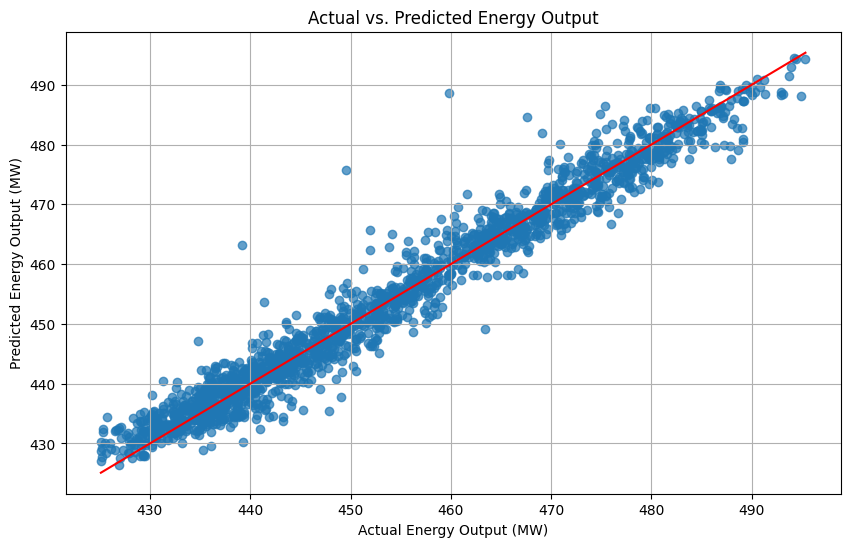

In [1]:
# Notebook/Script Content: power_plant_2.py

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for plotting

# %%
# Load dataset
data = pd.read_csv('power_plant_data.csv')  
# data.head()

# %% [markdown]
# ## 🔍 Exploratory Data Analysis

# %%
# Basic statistics
# data.describe()

# Separate features (X) and target (y)
X = data.drop("PE", axis=1)
y = data["PE"]

# Split data into training+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Linear Regression
lr = LinearRegression()
lr_scores = cross_val_score(lr, X_train_val, y_train_val, scoring='neg_root_mean_squared_error', cv=cv)
lr_rmse = -lr_scores.mean()

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf, X_train_val, y_train_val, scoring='neg_root_mean_squared_error', cv=cv)
rf_rmse = -rf_scores.mean()

print(f"Linear Regression RMSE (CV): {lr_rmse}")
print(f"Random Forest RMSE (CV): {rf_rmse}")

# Select the best model
if lr_rmse < rf_rmse:
    best_model = lr
    print("Linear regression selected as the best model")
else:
    best_model = rf
    print("Random Forest selected as the best model")

# Train the best model on the entire training+validation set
best_model.fit(X_train_val, y_train_val)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

print(f"Final Model RMSE (Test): {test_rmse}")
print(f"Final Model R-squared (Test): {test_r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Diagonal line for perfect predictions
plt.xlabel("Actual Energy Output (MW)")
plt.ylabel("Predicted Energy Output (MW)")
plt.title("Actual vs. Predicted Energy Output")
plt.grid(True)
plt.show()

# Optional: Save the model (example using pickle)
import pickle
with open('power_plant_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Example of loading the model
# with open('power_plant_model.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)
#     # Use loaded_model for predictions